In [3]:
pip install diagrams

     |████████████████████████████████| 23.2 MB 7.9 MB/s eta 0:00:011   |█████▌                          | 4.0 MB 3.3 MB/s eta 0:00:06
     |████████████████████████████████| 125 kB 7.9 MB/s eta 0:00:01
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 3.0.1
    Uninstalling Jinja2-3.0.1:
      Successfully uninstalled Jinja2-3.0.1
Note: you may need to restart the kernel to use updated packages.


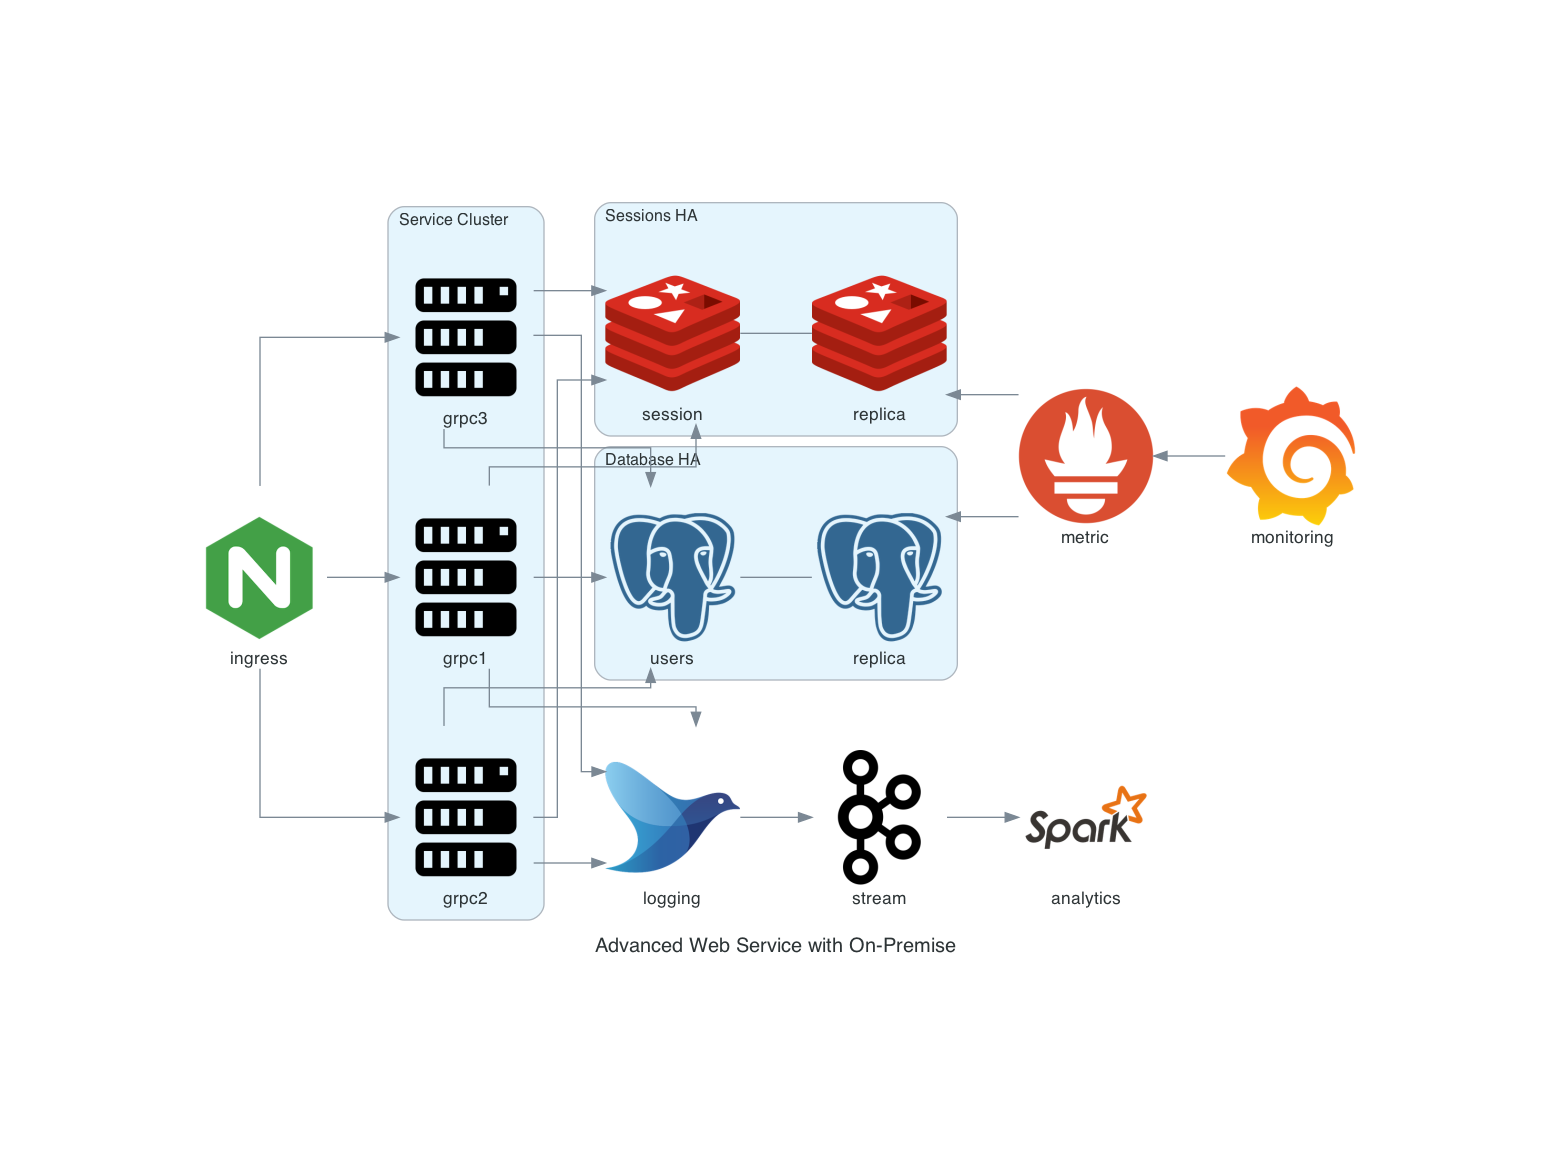

In [8]:
from diagrams import Cluster, Diagram
from diagrams.onprem.analytics import Spark
from diagrams.onprem.compute import Server
from diagrams.onprem.database import PostgreSQL
from diagrams.onprem.inmemory import Redis
from diagrams.onprem.aggregator import Fluentd
from diagrams.onprem.monitoring import Grafana, Prometheus
from diagrams.onprem.network import Nginx
from diagrams.onprem.queue import Kafka

with Diagram("Advanced Web Service with On-Premise", show=False) as diag:
    ingress = Nginx("ingress")

    metrics = Prometheus("metric")
    metrics << Grafana("monitoring")

    with Cluster("Service Cluster"):
        grpcsvc = [
            Server("grpc1"),
            Server("grpc2"),
            Server("grpc3")]

    with Cluster("Sessions HA"):
        main = Redis("session")
        main - Redis("replica") << metrics
        grpcsvc >> main

    with Cluster("Database HA"):
        main = PostgreSQL("users")
        main - PostgreSQL("replica") << metrics
        grpcsvc >> main

    aggregator = Fluentd("logging")
    ingress >> grpcsvc >> aggregator
    
diag